In [179]:
import numpy as np
import pandas as pd
import seaborn as sns

In [180]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from scipy import stats

# Uvod

Baza podataka "Black Friday Sales" sadrži podatke o kupovini u toku Crnog Petka. To je dan nakon Dana zahvalnosti i tada su veliki popusti i rasprodaje garderobe, elektronskih uređaja, itd. Veliki broj ljudi ide u kupovinu i troši više novca nego inače.

Analizom ponašanja potrošača, odnosno proučavanjem uticaja faktora kao što su starost, pol i lokacija na potrošačke navike, omogućava kompanijama da bolje prilagode svoje marketinške strategije. Predviđanjem iznosa kupovina one mogu bolje da upravljaju zalihama i da odrede ciljane promocije tokom budućih rasprodaja.
To cemo postici primenom mašinskog učenja. Glavni cilj je da kreiramo što bolji model na osnovu kog ćemo izvršiti predviđanje.

# Učitavanje podataka

In [181]:
data = pd.read_csv('Black Friday Dataset.csv')

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [183]:
data.shape

(550068, 12)

Baza sadrži informacije o preko 500.000 kupaca. Ona ima 12 kolona, koje predstavljaju podatke o kupcima, dakle na osnovu toga stičemo uvid u to ko kupuje i odakle dolazi. Zatim, imamo informacije o kategoriji proizvoda, i na kraju imamo kolonu 'Purchase' koja predstavlja iznos koji su kupci potrošili tokom rasprodaje.

# Preprocesiranje

In [184]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Za početak izbacićemo kolone ID kupaca i proizvoda jer one nemaju nikakvog uticaja na ishod kupovine.

In [185]:
data.drop('User_ID', axis=1, inplace=True)
data.drop('Product_ID', axis=1, inplace=True)

U kolonama 'Age' i 'Stay_In_Current_City_Years' se javljaju plusevi koje ćemo ukloniti.

In [186]:
data['Age'] = data['Age'].str.strip('+')
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.strip('+')

### Nedostajuće vrednosti

In [187]:
pd.DataFrame({'missing_values': data.isnull().sum(), 'missing_values_percent': missing_values / data.shape[0]*100})

,missing_values,missing_values_percent
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643
Product_Category_3,383247,69.672659
Purchase,0,0.000000


Kako imamo dosta nedostajućih podataka u koloni Product_Category_3 pa ćemo je izbaciti. Dok u koloni Product_Category_2 nedostajuće vrednosti dopunjavamo medijanom.

In [188]:
data.drop('Product_Category_3', axis=1, inplace=True)

In [189]:
data['Product_Category_2'].fillna(data['Product_Category_2'].median(), inplace = True)

/tmp/ipykernel_258752/610629193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Product_Category_2'].fillna(data['Product_Category_2'].median(), inplace = True)


In [190]:
data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

### Kodiranje kategoričkih promenljivih

In [191]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  
#data['Age'] = le.fit_transform(data['Age'])        
data['City_Category'] = le.fit_transform(data['City_Category'])
data['Stay_In_Current_City_Years'] = pd.to_numeric(data.Stay_In_Current_City_Years)

In [192]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,0,0-17,10,0,2,0,3,9.0,8370
1,0,0-17,10,0,2,0,1,6.0,15200
2,0,0-17,10,0,2,0,12,9.0,1422
3,0,0-17,10,0,2,0,12,14.0,1057
4,1,55,16,2,4,0,8,9.0,7969


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 37.8+ MB


#

In [194]:
data.describe()

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,8.076707,1.042640,1.858418,0.409653,5.404270,9.576434,9263.968713
std,0.431205,6.522660,0.760211,1.289443,0.491770,3.936211,4.226025,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,12.000000
25%,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,8.000000,5823.000000
50%,1.000000,7.000000,1.000000,2.000000,0.000000,5.000000,9.000000,8047.000000
75%,1.000000,14.000000,2.000000,3.000000,1.000000,8.000000,14.000000,12054.000000
max,1.000000,20.000000,2.000000,4.000000,1.000000,20.000000,18.000000,23961.000000


# Vizuelizacija podataka

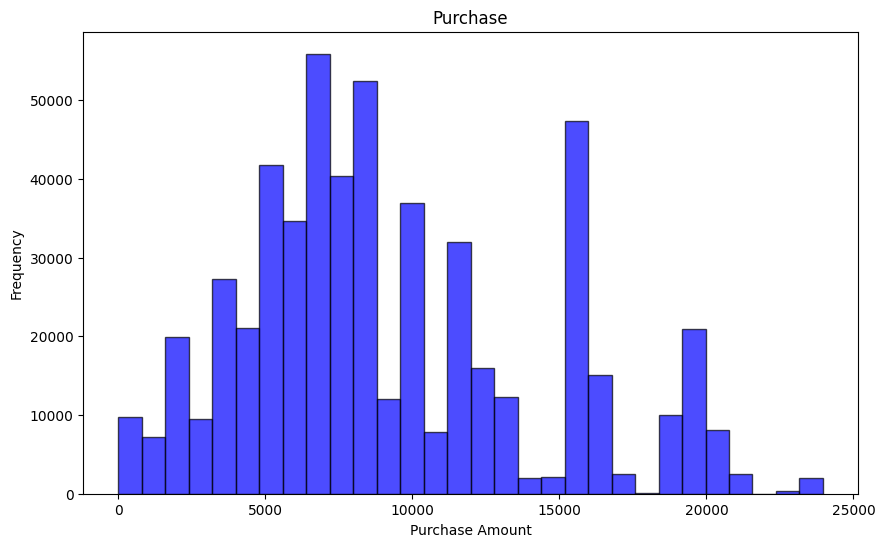

In [195]:
plt.figure(figsize=(10, 6))
plt.hist(data['Purchase'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Purchase')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show() 

In [196]:
#chat gpt analiza

In [197]:
stat, p = stats.shapiro(data['Purchase'])
print(f'Shapiro-Wilk test: Statistika = {stat}, p-vrednost = {p}')

Shapiro-Wilk test: Statistika = 0.9535839819424201, p-vrednost = 2.9829518736335884e-122


/home/aleksa/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 550068.
  res = hypotest_fun_out(*samples, **kwds)


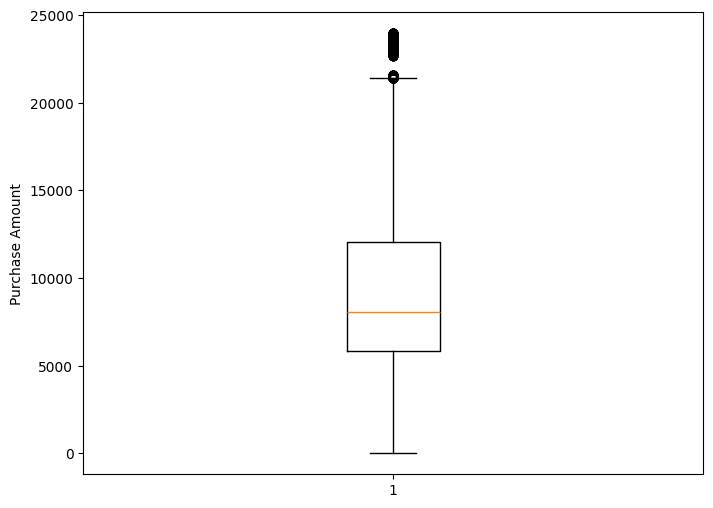

In [198]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Purchase'])
plt.ylabel('Purchase Amount')
plt.show()

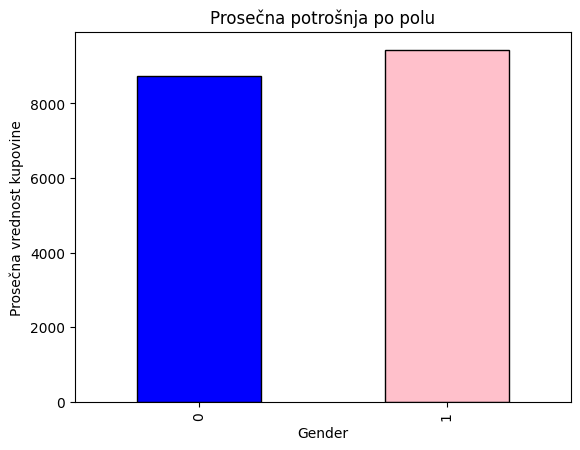

In [199]:
data.groupby('Gender')['Purchase'].mean().plot(kind='bar', color=['blue', 'pink'], edgecolor='black')
plt.title('Prosečna potrošnja po polu')
plt.ylabel('Prosečna vrednost kupovine')
plt.show()

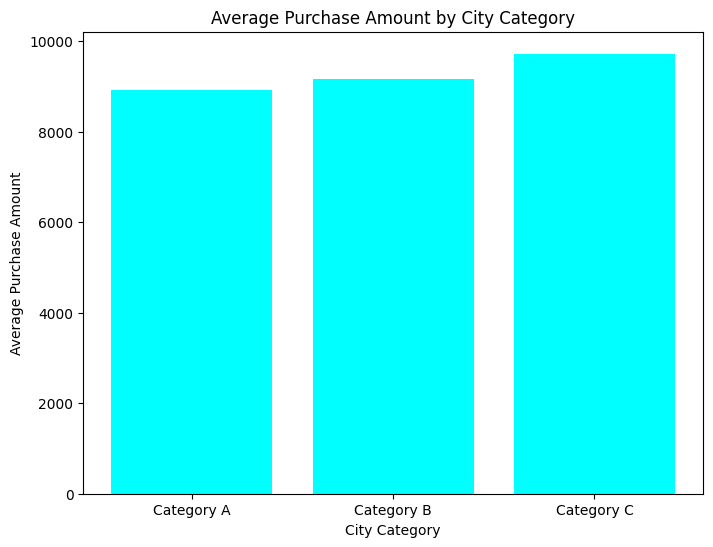

In [200]:
city_purchase = data.groupby('City_Category')['Purchase'].mean()

plt.figure(figsize=(8, 6))
plt.bar(['Category A', 'Category B', 'Category C'], city_purchase.values, color='cyan')
plt.title('Average Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

In [201]:
plt.figure(figsize=(12, 8))

corr_matrix = data.corr()
plt.matshow(corr_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix', pad=40)
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr_matrix.index)), labels=corr_matrix.index)
plt.show()

ValueError: could not convert string to float: '0-17'

<Figure size 1200x800 with 0 Axes>

In [202]:
corr_coefs = []
for feature in data.feature_names:
    corr_coef = np.corrcoef(data[feature].values, data['Purchase'])
    print('{:10s}: {}'.format(feature, corr_coef[0,1]))
    corr_coefs.append(corr_coef[0,1])

AttributeError: 'DataFrame' object has no attribute 'feature_names'

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'City_Category'}>],
       [<Axes: title={'center': 'Stay_In_Current_City_Years'}>,
        <Axes: title={'center': 'Marital_Status'}>,
        <Axes: title={'center': 'Product_Category_1'}>],
       [<Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Purchase'}>, <Axes: >]], dtype=object)

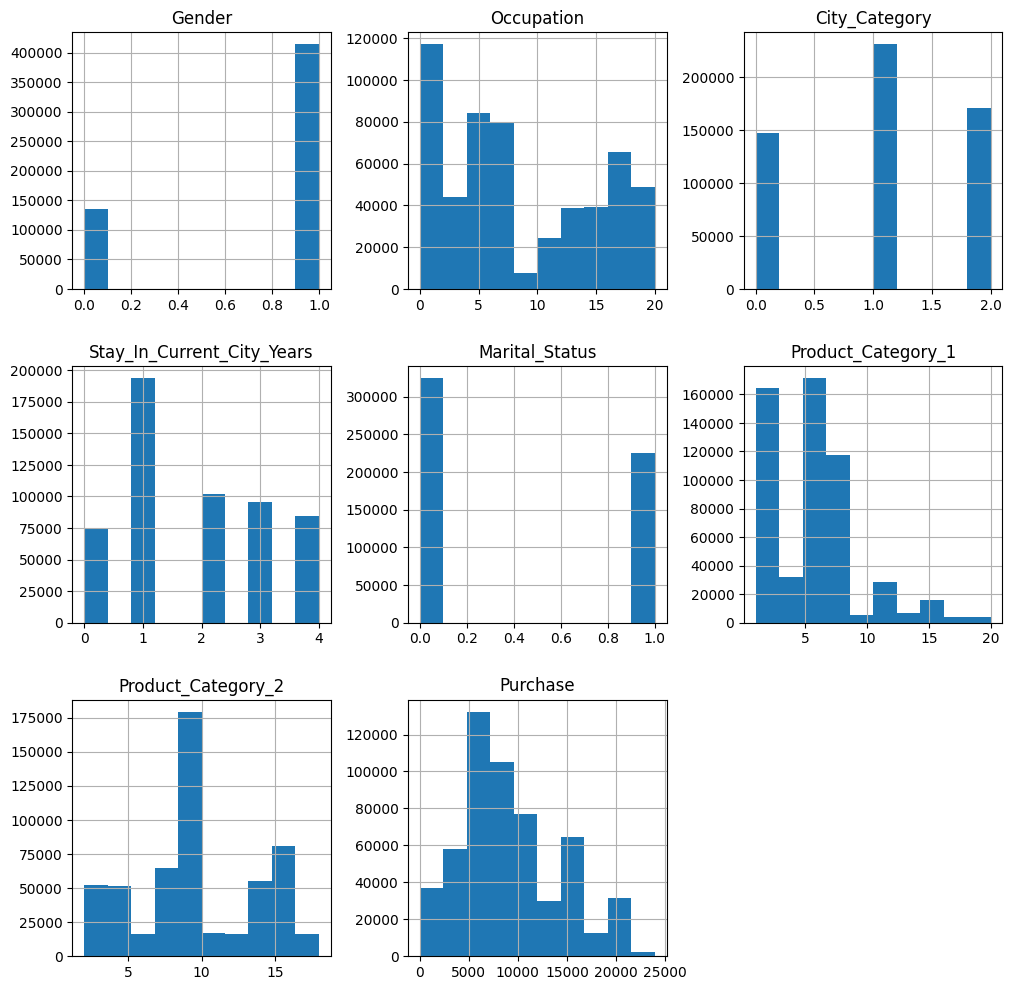

In [203]:
data.hist(figsize=(12,12))

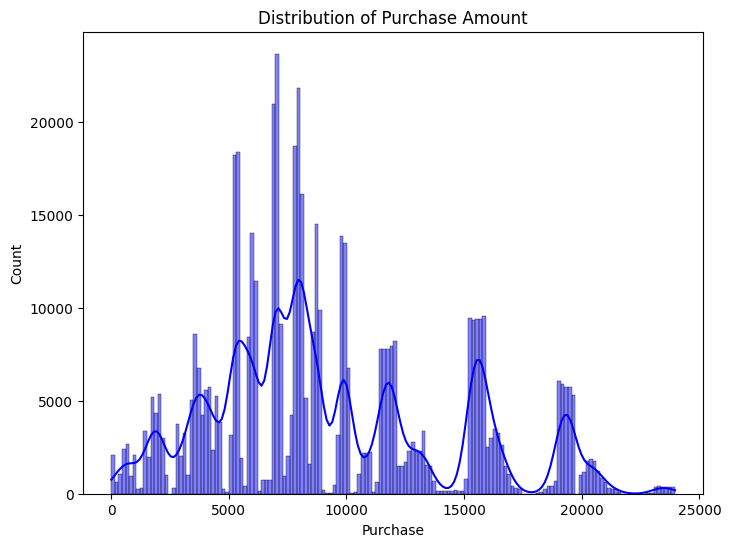

In [204]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Purchase'], kde=True, color='blue')
plt.title('Distribution of Purchase Amount')
plt.show()

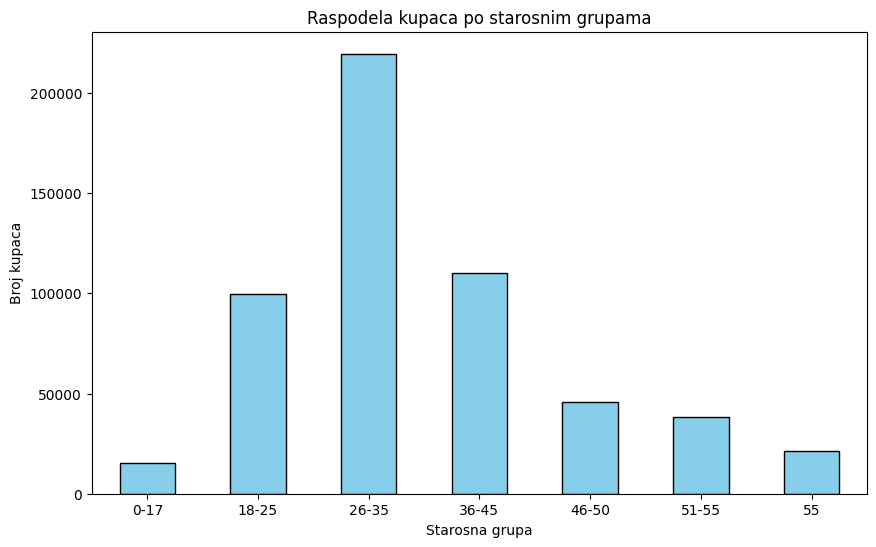

In [205]:
plt.figure(figsize=(10, 6))
data['Age'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Raspodela kupaca po starosnim grupama')
plt.xlabel('Starosna grupa')
plt.ylabel('Broj kupaca')
plt.xticks(rotation=0)
plt.show()

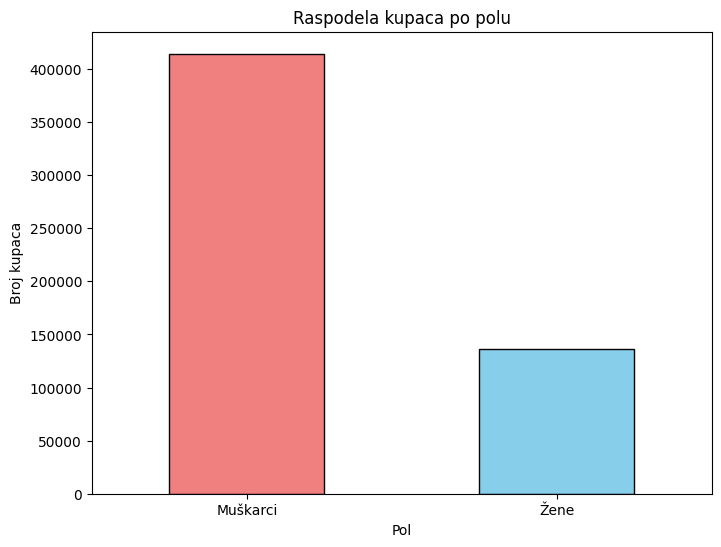

In [206]:
plt.figure(figsize=(8, 6))
data['Gender'].value_counts().plot(kind='bar', color=['lightcoral', 'skyblue'], edgecolor='black')
plt.title('Raspodela kupaca po polu')
plt.xlabel('Pol')
plt.ylabel('Broj kupaca')
plt.xticks([0, 1], ['Muškarci', 'Žene'], rotation=0)
plt.show()

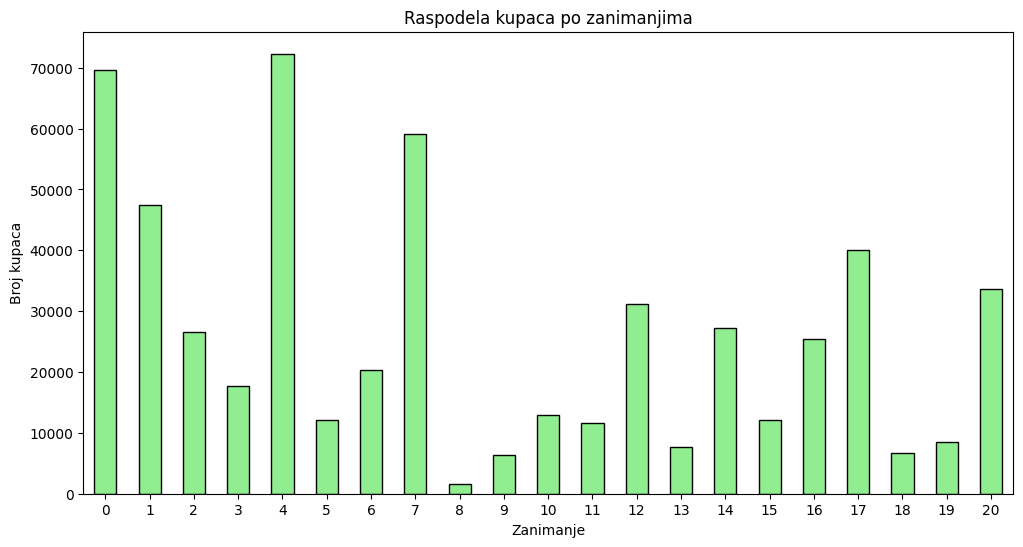

In [207]:
plt.figure(figsize=(12, 6))
data['Occupation'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Raspodela kupaca po zanimanjima')
plt.xlabel('Zanimanje')
plt.ylabel('Broj kupaca')
plt.xticks(rotation=0)
plt.show()

/tmp/ipykernel_258752/1855213917.py:1: FutureWarning: The provided callable <function mean at 0x7f0fbc00beb0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.pivot_table(index='Age', values='Purchase', aggfunc=np.mean).plot(kind='bar', figsize=(13, 7))


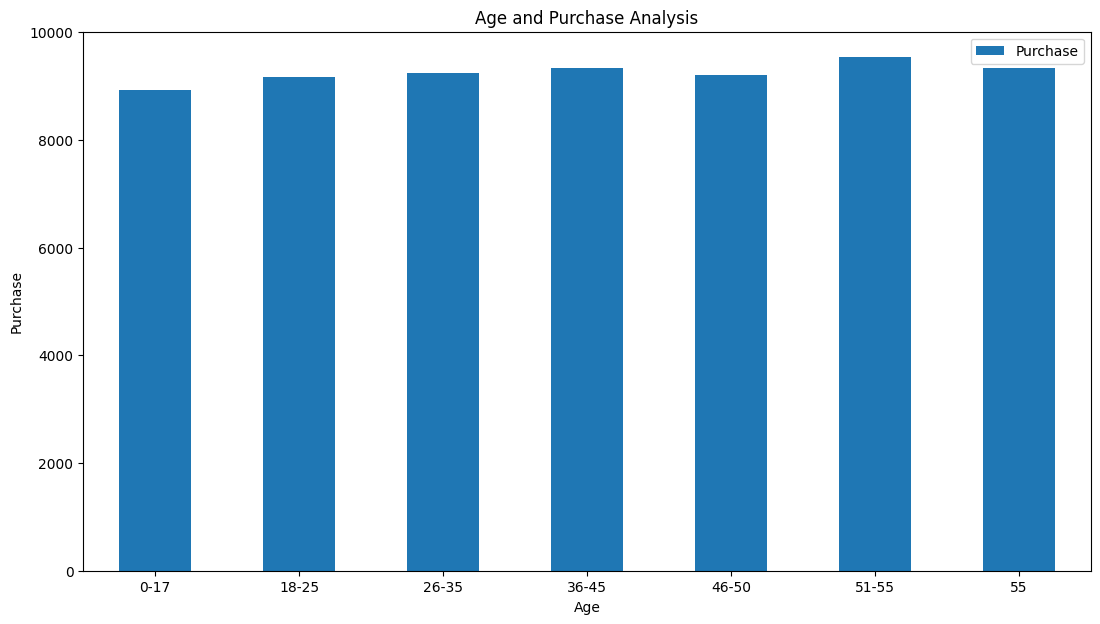

In [208]:
data.pivot_table(index='Age', values='Purchase', aggfunc=np.mean).plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

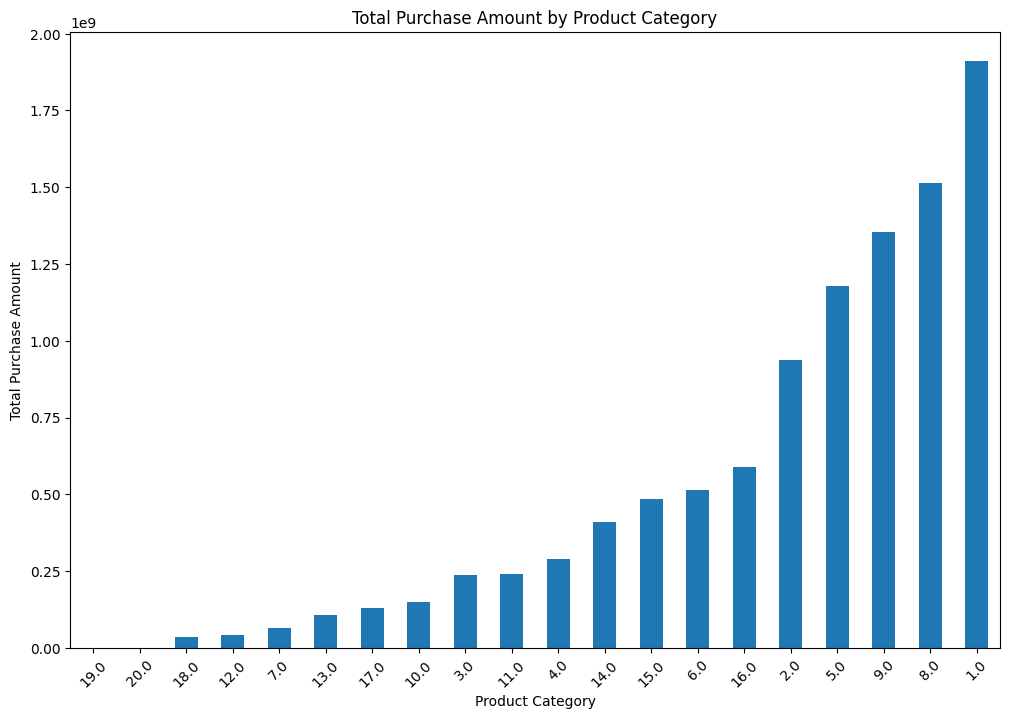

In [209]:
category_purchase = data[['Product_Category_1', 'Product_Category_2', 'Purchase']].copy()
category_purchase = category_purchase.melt(id_vars='Purchase', var_name='Category', value_name='Product_Category')
category_purchase = category_purchase.groupby('Product_Category')['Purchase'].sum().sort_values()

plt.figure(figsize=(12, 8))
category_purchase.plot(kind='bar')
plt.title('Total Purchase Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#vidimo koje su kategorije proizvoda najtrazenije tokom crnog petka

In [ ]:
#iydvajamo ciljanu promenljivu z + purchase

In [ ]:
# standardizacija